In [1]:
import calculation_f as clc
import api_data as api
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# SETTINGS

In [2]:
ticker = 'FB'
est_growth = pd.Series([0, 2, 4, 6, 8]) / 100
#starting_cf = [180000000, 280000000, 280000000, 280000000, 280000000]
starting_cf = []

req_return = 0.22
r_f_rate = 0.01
maintenance_capex_coef = 0.5

# DataFrames

In [3]:
data_dict = clc.load_data(ticker)
years = clc.set_index_years(data_dict)
table = clc.create_summary_table(data_dict, years)
table = clc.add_cf4o(table, maintenance_capex_coef)

In [4]:
debt_ratios = clc.debt_info(table)


In [5]:
ROIC, roic_stats = clc.ROIC_calc(table)

In [6]:
growth_history_table = clc.create_growth_table(table)

In [7]:
if not starting_cf:
    starting_cf = clc.set_cf_if_unfilled(table, est_growth)
cf_models_table, cf_models_part = clc.cf_estimate_table(est_growth, starting_cf)

In [8]:
shs_out = clc.get_shares_out(ticker)
final_table = clc.create_final_table(cf_models_part, cf_models_table, shs_out, r_f_rate, req_return)

In [9]:
clc.format_growth_cf(cf_models_table)
clc.format_final_table(final_table)

# RESULTS

### Business Fundamentals

In [10]:
table

,sales,eps,equity,long_term_debt,current_liabilities,current_assets,total_liabilities,operating_cash_flow,maintenance_capex,cf4o
2009,777000000,0.08,0,0,0,0,0,155000000,-33000000,1.385000e+08
2010,1974000000,0.26,2162000000,250000000,389000000,2246000000,828000000,698000000,-293000000,5.515000e+08
2011,3711000000,0.44,4899000000,0,899000000,4604000000,1432000000,1549000000,-606000000,1.246000e+09
2012,5089000000,0.01,11755000000,1504000000,1052000000,11267000000,3348000000,1612000000,-1235000000,9.945000e+08
2013,7872000000,0.59,15470000000,0,1100000000,13070000000,2425000000,4222000000,-1362000000,3.541000e+09
2014,12466000000,1.09,36096000000,0,1424000000,13390000000,3870000000,7326000000,-1831000000,6.410500e+09
2015,17928000000,1.28,44218000000,0,1925000000,21652000000,5189000000,10320000000,-2523000000,9.058500e+09
2016,27638000000,3.48,59194000000,0,2875000000,34401000000,5767000000,16108000000,-4491000000,1.386250e+10
2017,40653000000,5.38,74347000000,0,3760000000,48563000000,10177000000,24216000000,-6733000000,2.084950e+10
2018,55838000000,7.56,84127000000,0,7017000000,50480000000,13207000000,29274000000,-13915000000,2.231650e+10


### Debt ratios 

In [11]:
debt_ratios

,CURRENT RATIO,DEBT TO EQUITY RATIO
2009,NaN,NaN
2010,5.773779,0.382979
2011,5.121246,0.292305
2012,10.710076,0.284815
2013,11.881818,0.156755
2014,9.403090,0.107214
2015,11.247792,0.117350
2016,11.965565,0.097425
2017,12.915691,0.136885
2018,7.193958,0.156989


### ROIC

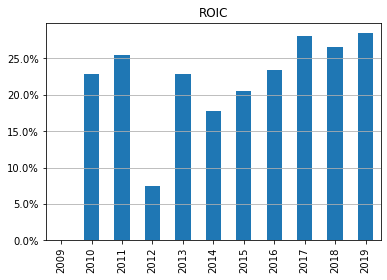

In [12]:
ax = ROIC.plot.bar(title='ROIC')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(axis='y')

In [13]:
ROIC.to_frame(name='ROIC %')

,ROIC %
2009,NaN
2010,22.864842
2011,25.433762
2012,7.500566
2013,22.889463
2014,17.759586
2015,20.486001
2016,23.418759
2017,28.043499
2018,26.527155


In [14]:
roic_stats


,ROIC_AVERAGES
1 YR AVERAGE,28.463000
10 YR AVERAGE,22.338663


### Historical growth

In [15]:
growth_history_table.T

,9YR,7YR,5YR,3YR,1YR
SALES,48.823889,45.630603,41.492941,36.761795,26.610910
EPS,42.800285,151.812006,42.567885,22.645588,-15.079365
EQUITY,53.292879,35.980251,22.862369,19.515786,20.120770
CF4O,55.170747,61.713790,35.017000,27.545226,28.886698


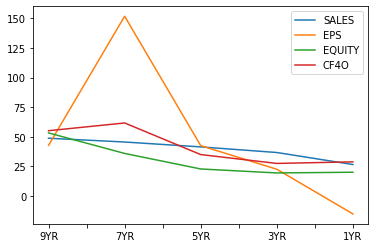

In [16]:
growth_history_table.plot()

### CashFlow growth models

In [17]:
cf_models_table

,GROWTH,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,TERMINAL VALUE
MODEL 1,0.0 %,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$28763.0,$287630.0
MODEL 2,2.0 %,$28763.0,$29338.26,$29925.03,$30523.53,$31134.0,$31756.68,$32391.81,$33039.65,$33700.44,$34374.45,$35061.94,$350619.36
MODEL 3,4.0 %,$28763.0,$29913.52,$31110.06,$32354.46,$33648.64,$34994.59,$36394.37,$37850.15,$39364.15,$40938.72,$42576.27,$425762.66
MODEL 4,6.0 %,$28763.0,$30488.78,$32318.11,$34257.19,$36312.62,$38491.38,$40800.87,$43248.92,$45843.85,$48594.48,$51510.15,$515101.52
MODEL 5,8.0 %,$28763.0,$31064.04,$33549.16,$36233.1,$39131.74,$42262.28,$45643.27,$49294.73,$53238.31,$57497.37,$62097.16,$620971.6


### Intrinsic value/ Buy price

In [18]:
final_table

,GROWTH,Y0,INTRINSIC VALUE,BUY PRICE,I.V. / SHARE,B.P. / SHARE
MODEL 1,0.0 %,$28763.0,$530232.72,$145118.28,186.046570,$50.92
MODEL 2,2.0 %,$28763.0,$618036.05,$161555.44,216.854755,$56.69
MODEL 3,4.0 %,$28763.0,$720686.78,$180285.44,252.872553,$63.26
MODEL 4,6.0 %,$28763.0,$840509.25,$201638.2,294.915527,$70.75
MODEL 5,8.0 %,$28763.0,$980148.26,$225987.22,343.911671,$79.29
